# Hardware and Safety aspects


## Design choices for part A

To obtain an homogeneous magnetic field around the isocenter of the magnet with two coils, the Helmholtz configuration was chosen. 
The magnetic field along the axis of a circular coil can be described with the following expression, derived from the Biot and Savart law: $B_z(b,z)=\frac{(μ_0 \cdot I \cdot a^2)}{2 \cdot (a^2+b^2)}^\frac{3}{2}$ where a is the coil radius, I is the coil current, and b is the distance of the center of the coil. 
Using the Taylor expansion, higher-order terms appear. Inserting an identical coil, with same radius and current, placed symmetrically about the origin, the total field at distance z along the coil axis will be the sum of the magnetic fields of the two coils. In this summation, the higher-order terms with odd-powers of z will cancel and the higher-order terms with even powers will add. To cancel the second-order terms the pair of coils can be placed at $±b=±\frac{a}{2}$. The resulting magnetic field, described in the following expression is uniform and symmetric: $B_z(z)=\frac{4}{5}^\frac{3}{2}\frac{(μ_0 \cdot I)}{a}(1+O(\frac{z^4}{(a^2+b^2)^2}))$. 
 


For the second case, where a homogenous magnetic field around the isocenter was designed using four of coils, the Lee-Whiting 6th order corrected design was used. In this part the Biot Savart law was also used but the parameters b and I was assigned other values compared to the case with just two coils, for this part $b_1=0.243186*a$ and $b_2= 0.940733*a$ and $I_2 = 2.26044*I_1$. $b_1$ is the distance from the isocenter to the center of the inner coils and $b_2$ is the the distance from the outer coils from the isocenter, in both positive and negative direction along the z-axis. 

In the plots of the magnetic field strength it can bee seen that both the 2 coil and the 4 coil configuration reach a maximum magnetic field strength at the isocenter, where both configurations is equal to $B_0 = 3T$. The slopes of the magnetic field strength for both cases is similar but the two-coil configuration is a little more narrow at the isocenter compared to the four-coil configuration. For both configurations the magnetic field strength decreases and is close to zero at the edges of the MR room, which is ±4m in the z-direction.

As it can be noticed in figure(1). The main static magnetic field is non-zero around the isocenter. This represents a risk for the patient, who should not be exposed to a static magnetic field greater than $5\cdot 10^{-4} T$. To null the magnetic field outside the isocenter, shielding coils can be included. A reasonable configuration of the shielding coils is the Helmholtz configuration to ensure the magnetic field homogeneity. The currents of the shielding coils where optimized to get a static magnetic field equals to $B_0$ at the isocenter $z=0$ and equals to $0$ approximately $1.2 m$ away from the isocenter. It was observed that requiring the static magnetic field to be $0$ closer to the isocenter than $1.2 m$ was too restrictive and resulted in unwanted negative lobes.
As expected the shielding coils have currents, $I_{shielding}=-1669146.33 A$, in the opposite sense to that of the main coils, $I_{main}=2753233.87 A$.

As it can be noticed in figure(2). With the shielded coils, the main static magnetic field is effectively nulled from $1.2 m$ from the isocenter, while it remains $B_0$ at the isocenter.


Analytical solution for current for a pair of coils that optimize homogeneity around isocenter is: 1501374.12 A
Current for a pair of coils that optimize homogeneity around isocenter is: 1501374.12 A
Currents for two pairs of coils that optimize homogeneity around isocenter are: 599875.41 A, 1355982.38 A


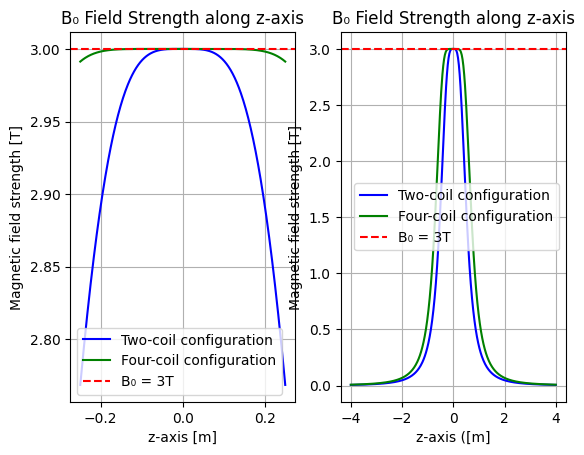

Current for a pair of coils: 2753233.87 A
Current for a pair of coils that shields the magnetic field: -1669146.33 A


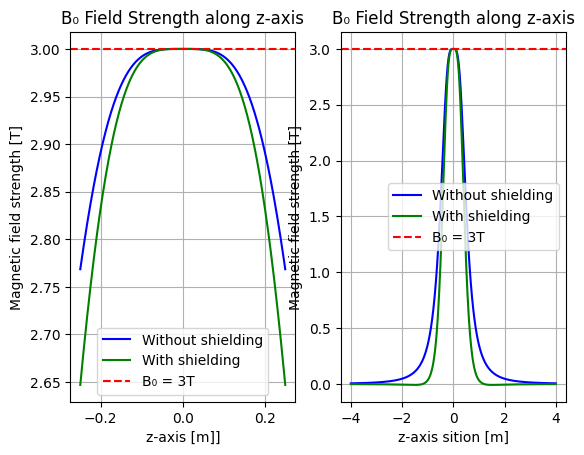

In [13]:
from cmath import pi, sqrt, sin
from scipy.optimize import fsolve
import numpy as np
import matplotlib.pyplot as plt


# Constants
mu0 = 4 * pi * 1e-7  # Vacuum permeability [Tm/A]
d = 0.90             # Diameter of the coil [m]
a = d / 2            # Radius of the coil [m]]
B0 = 3               # Desired field strength at isocenter [T]
d_s = 1.2            # Diameter of the shielding coil [m]
a_s = d_s / 2        # Radius of the shielding coil [m]]
X_iron = 200000      # Magnetic susceptibility of iron
d_g = 0.80           # Diameter of the gradient coil [m]
a_g = d_g / 2        # Radius of the gradient coil [m]
Gz = 0.08            # Desired gradient at isocenter [T/m]
S = 200              # Slew rate [T/ms]
# Assumed values fro oxygen tube and scissor
D_O2tube = 0         # Demagnetisation factor for the oxygen tube for worst alignment
D_scissor = 0        # Demagnetisation factor for the scissor for worst alignment
V_O2tube = 0.2       # Volume of the oxygen tube 1x0.5 [m^3]
V_scissor = 0.00005  # Volume of the scissor 0.1x0.05x0.01 [m^3]
l_O2tube = 1         # Volume of the oxygen tube [m]
l_scissor = 0.1      # Volume of the scissor [m]


### Part A: constructing the B0 coil ########################################################################################################
def field_B(z, I, a, b):
    # Calculate the magnetic field strength at a point along the axis of a single coil.
    #
    # INPUT:
    # z : position along the coil axis [m]
    # I : current through the coil [A]
    # a : radius of the coil [m]
    # b : position of the coil [m]
    #
    # RETURN:
    # B : magnetic field strength at position z [T]


    # Biot-Savart law
    field_B = (mu0 * I * a**2) / (2 * ((sqrt(a**2 + (z - b)**2))**3))


    return field_B


def total_B(z, I, A, B):
    # Calculate the total magnetic field strength for multiple pairs of coils.
    #
    # INPUT:
    # z : position along the coil axis [m]
    # I : current through the coils [A]
    # A : list of radii of the coils [m]
    # B : list of positions of the coils [m]
    #
    # RETURN:
    # total_B : magnetic field strength at position z [T]


    total_B = 0
    for i,a,b, in zip(I,A,B):
        total_B += field_B(z, i, a, b) + field_B(z, i, a, -b)
   
    return total_B


def optimize_currents(I, A, B):
    # Create a system of equations to optimize currents for Helmholtz configuration, satisfying homogeneity conditions
    #
    # INPUT:
    # I : currents through the coils [A]
    # z_hc : position along the coil axis, where the field is evaluated [m]
    # A : radius of the coils [m]
    # B : position of the coils [m]
    #
    # RETURN:
    # optimize_currents : equation system to find optimal currents for Helmholtz configuration
   
    optimize_currents = [total_B(0, I, A, B) - B0]
   
    return optimize_currents


def optimize_currents2(I1, A, B):
    # Create a system of equations to optimize currents for Lee-Whiting configuration, satisfying homogeneity conditions
    #
    # INPUT:
    # I1 : current through the coils [A]
    # z_hc : position along the coil axis, where the field is evaluated [m]
    # A : list of radii of the coils [m]
    # B : list of positions of the coils [m]
    #
    # RETURN:
    # optimize_currents2 : equation system to find optimal currents for Lee-Whiting configuration
   
    i1=I1[0]            # current of inner pair
    i2 = 2.26044*i1     # current of outer pair
    optimize_currents2 = [total_B(0, [i1,i2], A, B) - B0]
   
    return optimize_currents2


# Optimal currents for Helmholtz configuration
I_2_opt_1 = fsolve(optimize_currents, [3*1e4], args=([a], [a/2]))


I_2_opt_analytical = B0*a / (mu0*(4/5)**(3/2))
print(f'Analytical solution for current for a pair of coils that optimize homogeneity around isocenter is: {I_2_opt_analytical:.2f} A')


# Optimal currents for Lee-Whiting configuration
I_4_opt_1 = fsolve(optimize_currents2, [1000], args=([a,a], [0.243186*a, 0.940733*a]))
I_4_opt_2 = 2.26044*I_4_opt_1


# Output of the optimal currents
I_2_opt_1 = np.real(I_2_opt_1.item())  # Get real part as a number
I_4_opt_1 = np.real(I_4_opt_1.item())
I_4_opt_2 = np.real(I_4_opt_2.item())
print(f'Current for a pair of coils that optimize homogeneity around isocenter is: {I_2_opt_1:.2f} A')
print(f'Currents for two pairs of coils that optimize homogeneity around isocenter are: {I_4_opt_1:.2f} A, {I_4_opt_2:.2f} A')


# Magnetic field along z-axis
z_values_a = np.linspace(-0.25, 0.25, 500)
B_values_2_coils_a = [total_B(z, [I_2_opt_1], [a], [a/2]) for z in z_values_a]
B_values_4_coils_a = [total_B(z, [I_4_opt_1,I_4_opt_2], [a, a], [0.243186*a, 0.940733*a]) for z in z_values_a]
z_values_b = np.linspace(-4, 4, 500)
B_values_2_coils_b = [total_B(z, [I_2_opt_1], [a], [a/2]) for z in z_values_b]
B_values_4_coils_b = [total_B(z, [I_4_opt_1,I_4_opt_2], [a, a], [0.243186*a, 0.940733*a]) for z in z_values_b]


plt.figure(1)
plt.subplot(1,2,1)
plt.plot(z_values_a, B_values_2_coils_a, color='b', label='Two-coil configuration')
plt.plot(z_values_a, B_values_4_coils_a, color='g', label='Four-coil configuration')
plt.axhline(3, color='r', linestyle='--', label='B₀ = 3T')
plt.xlabel('z-axis [m]'); plt.ylabel('Magnetic field strength [T]'); plt.title('B₀ Field Strength along z-axis')
plt.legend(); plt.grid()
plt.subplot(1,2,2)
plt.plot(z_values_b, B_values_2_coils_b, color='b', label='Two-coil configuration')
plt.plot(z_values_b, B_values_4_coils_b, color='g', label='Four-coil configuration')
plt.axhline(3, color='r', linestyle='--', label='B₀ = 3T')
plt.xlabel('z-axis ([m]'); plt.ylabel('Magnetic field strength [T]'); plt.title('B₀ Field Strength along z-axis')
plt.legend(); plt.grid()
plt.show()


def optimize_currents3(I, A, B):
    # Create a system of equations to optimize currents for shielding coils for Helmholtz configuration, achieving shielding
    #
    # INPUT:
    # I_s : current through the shielding coils [A]
    # I : current through the coils [A]
    # z_hc : position along the coil axis, where the field is evaluated [m]
    # A : list of radii of the coils [m]
    # B : list of positions of the coils [m]
    #
    # RETURN:
    # optimize_currents2 : equation system to find optimal currents for Helmholtz configuration


    optimize_currents3 = [total_B(0, [I[0], I[1]], [a, a_s], [a/2, a_s/2]) - B0, total_B(1.2, [I[0], I[1]], [a, a_s], [a/2, a_s/2]) - (B0 * 1e-6) ]
   
    return optimize_currents3


# Optimal currents for shielding coils for Helmholtz configuration
I_opt_s = fsolve(optimize_currents3, [1e4, 1e4], args=([a, a_s], [a/2, a_s/2]))
I_2_opt_s = np.real(I_opt_s[0])
I_s_opt_s = np.real(I_opt_s[1])
print(f'Current for a pair of coils: {I_2_opt_s:.2f} A')
print(f'Current for a pair of coils that shields the magnetic field: {I_s_opt_s:.2f} A')


# Magnetic field along z-axis
z_values_a = np.linspace(-0.25, 0.25, 500)
B_values_2_coils_a = [total_B(z, [I_2_opt_1], [a], [a/2]) for z in z_values_a]
B_values_s_coils_a = [total_B(z, [I_2_opt_s, I_s_opt_s], [a, a_s], [a/2, a_s/2]) for z in z_values_a]
z_values_b = np.linspace(-4, 4, 500)
B_values_2_coils_b = [total_B(z, [I_2_opt_1], [a], [a/2]) for z in z_values_b]
B_values_s_coils_b = [total_B(z, [I_2_opt_s, I_s_opt_s], [a, a_s], [a/2, a_s/2]) for z in z_values_b]


plt.figure(2)       # Magnetic field along z-axis without and with shielding
plt.subplot(1,2,1)
plt.plot(z_values_a, B_values_2_coils_a, color='b', label='Without shielding')
plt.plot(z_values_a, B_values_s_coils_a, color='g', label='With shielding')
plt.axhline(3, color='r', linestyle='--', label='B₀ = 3T')
plt.xlabel('z-axis [m]]'); plt.ylabel('Magnetic field strength [T]'); plt.title('B₀ Field Strength along z-axis')
plt.legend(); plt.grid()
plt.subplot(1,2,2)
plt.plot(z_values_b, B_values_2_coils_b, color='b', label='Without shielding')
plt.plot(z_values_b, B_values_s_coils_b, color='g', label='With shielding')
plt.axhline(3, color='r', linestyle='--', label='B₀ = 3T')
plt.xlabel('z-axis sition [m]'); plt.ylabel('Magnetic field strength [T]'); plt.title('B₀ Field Strength along z-axis')
plt.legend(); plt.grid()
plt.show()

## Part B
As the magnetic field is non-zero outside the iso-center, magnetic objects will experience displacement and rotational forces. 
The displacement force can be expressed as: $F_d=\frac{1}{mu_0}\cdot V\cdot \frac{X}{1+DX}\cdot B \cdot |\nabla B|$ where $V$ is the volume of the object, $X$ is the material specific susceptibility and $D$ is the demagnetisation factor.
The rotational force can be expressed as: $F_t=\frac{X^2VB^2sin(2\theta)}{0.5\cdot L}$ where $\theta$ is the angle between the magnetic field and the object’s long axis and $L$ is the length of the long axis of the object.
The displacement force depends on the magnetic field strength and on its spatial variation, while the rotational force depends on the magnetic field strength and the angle between the magnetic field and the object's long axis. 
For the object parameters it seemed reasonable to choose an oxygen tube with length $100 cm$ and diameter $50 cm$, with a volume of $0.2 m^3$, and a scissor with dimensions $10 cm$, $5 cm$, $1 cm$ and volume of $50 cm^3$.

As expected, for both the oxygen tube and the scissor, the displacement force was maximum where the spatial gradient was maximum, and lower at $±4 m$ around the isocenter, where the magnetic field is weak. 

As expected, the force experienced by the oxygen tube with and without shielding are equal at the isocenter where the shielded and unshielded coils configuration give the same magnetic field, $B_0$. 

The ratio of the rotational and the displacement force for the oxygen tube was found to be close to zero where the spatial gradient of the magnetic field is zero. At the isocenter, as the spatial gradient of the magnetic field is zero, the displacement force will be zero and the ratio will diverge.


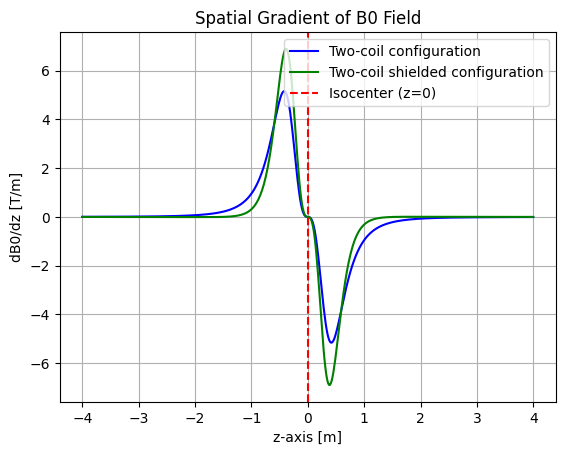

Displacement force for oxygen tube at isocenter: -82647368.58 N for 2 coils, -129725053.32 N for 4 coils
Displacement force for oxygen tube at max gradient: 326274867581.15 N for 2 coils, -388216823609.16 N for 4 coils
Displacement force for oxygen tube at -4m: 856348.53 N for 2 coils, 16682.09 N for 4 coils
Displacement force for oxygen tube at +4m: -856348.53 N for 2 coils, -16682.09 N for 4 coils
Displacement force for scissor at isocenter: -20661.84 N for 2 coils, -32431.26 N for 4 coils
Displacement force for scissor at max gradient: 81568716.90 N for 2 coils, -97054205.90 N for 4 coils
Displacement force for scissor at -4m: 214.09 N for 2 coils, 4.17 N for 4 coils
Displacement force for scissor at +4m: -214.09 N for 2 coils, -4.17 N for 4 coils
Max rotational force ratio with and without shielding: 1.00


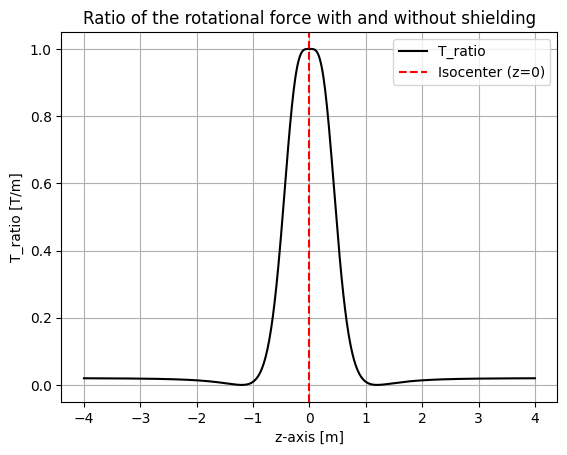

Max rotational and translational force ratio: 1110.04


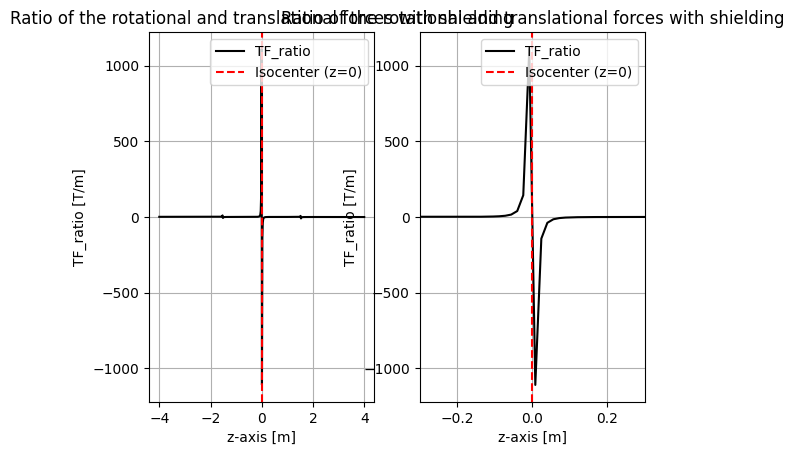

In [14]:
### Part B: safety aspects related to B0 field ##############################################################################################
def gradient_dBdz(z, B):
    # Compute the gradient dB/dz
    #
    # INPUT:
    # z : values of space positions [m]
    # B : values of magnetic field [T]
    #
    # RETURN:
    # gradient : values of gradient of B along space z [T/m]
    dz = z[1] - z[0]
    gradient = np.gradient(B, dz)
   
    return gradient


# Spatial gradient of magnetic field along z-axis
dBdz_2_coils = gradient_dBdz(z_values_b,B_values_2_coils_b)
dBdz_s_coils = gradient_dBdz(z_values_b,B_values_s_coils_b)


plt.figure(3)
plt.plot(z_values_b, dBdz_2_coils, color='b', label='Two-coil configuration')
plt.plot(z_values_b, dBdz_s_coils, color='g', label='Two-coil shielded configuration')
plt.axvline(0, color='r', linestyle='--', label='Isocenter (z=0)')
plt.xlabel('z-axis [m]'); plt.ylabel('dB0/dz [T/m]'); plt.title('Spatial Gradient of B0 Field')
plt.legend(); plt.grid()
plt.show()


def displacement_force(B, dBdz, V, X, D):
    # Compute the displacement force
    #
    # INPUT:
    # B    : values of magnetic field [T]
    # dBdz : values of gradient of B along space z [T/m]
    # V    : volume [m^3]
    # X    : material specific susceptibility []
    # D    : material demagnetisation factor []
    #
    # RETURN:
    # displacement_force : displacement force [N]
    displacement_force = (1/mu0) * V * (X/(1+(D*X))) * np.array(B) * np.array(dBdz)
   
    return displacement_force


# Compute forces
F_O2_2_coils = displacement_force(B_values_2_coils_b, dBdz_2_coils, V_O2tube, X_iron, D_O2tube)
F_O2_s_coils = displacement_force(B_values_s_coils_b, dBdz_s_coils, V_O2tube, X_iron, D_O2tube)
F_scissor_2_coils = displacement_force(B_values_2_coils_b, dBdz_2_coils, V_scissor, X_iron, D_scissor)
F_scissor_s_coils = displacement_force(B_values_s_coils_b, dBdz_s_coils, V_scissor, X_iron, D_scissor)


index_z_a = np.argmin(np.abs(z_values_b))       # isocenter
index_z_b_2 = np.argmax(np.abs(dBdz_2_coils))   # point of maximum spatial gradient for two coils
index_z_b_s = np.argmax(np.abs(dBdz_s_coils))   # point of maximum spatial gradient for four coils
index_z_c_minus = 0                             # -4m around the isocenter
index_z_c_plus = len(z_values_b)-1              # +4m around the isocenter


F_O2_2_coils_a =  np.real(F_O2_2_coils[index_z_a]);             F_O2_s_coils_a =  np.real(F_O2_s_coils[index_z_a])            
F_O2_2_coils_b =  np.real(F_O2_2_coils[index_z_b_2]);           F_O2_s_coils_b =  np.real(F_O2_s_coils[index_z_b_s])        
F_O2_2_coils_c_minus =  np.real(F_O2_2_coils[index_z_c_minus]); F_O2_s_coils_c_minus =  np.real(F_O2_s_coils[index_z_c_minus])
F_O2_2_coils_c_plus =  np.real(F_O2_2_coils[index_z_c_plus]);   F_O2_s_coils_c_plus =  np.real(F_O2_s_coils[index_z_c_plus])  


F_scissor_2_coils_a =  np.real(F_scissor_2_coils[index_z_a]);             F_scissor_s_coils_a =  np.real(F_scissor_s_coils[index_z_a])            
F_scissor_2_coils_b =  np.real(F_scissor_2_coils[index_z_b_2]);           F_scissor_s_coils_b =  np.real(F_scissor_s_coils[index_z_b_s])        
F_scissor_2_coils_c_minus =  np.real(F_scissor_2_coils[index_z_c_minus]); F_scissor_s_coils_c_minus =  np.real(F_scissor_s_coils[index_z_c_minus])
F_scissor_2_coils_c_plus =  np.real(F_scissor_2_coils[index_z_c_plus]);   F_scissor_s_coils_c_plus =  np.real(F_scissor_s_coils[index_z_c_plus])  


print(f"Displacement force for oxygen tube at isocenter: {F_O2_2_coils_a:.2f} N for 2 coils, {F_O2_s_coils_a:.2f} N for 4 coils")
print(f"Displacement force for oxygen tube at max gradient: {F_O2_2_coils_b:.2f} N for 2 coils, {F_O2_s_coils_b:.2f} N for 4 coils")
print(f"Displacement force for oxygen tube at -4m: {F_O2_2_coils_c_minus:.2f} N for 2 coils, {F_O2_s_coils_c_minus:.2f} N for 4 coils")
print(f"Displacement force for oxygen tube at +4m: {F_O2_2_coils_c_plus:.2f} N for 2 coils, {F_O2_s_coils_c_plus:.2f} N for 4 coils")


print(f"Displacement force for scissor at isocenter: {F_scissor_2_coils_a:.2f} N for 2 coils, {F_scissor_s_coils_a:.2f} N for 4 coils")
print(f"Displacement force for scissor at max gradient: {F_scissor_2_coils_b:.2f} N for 2 coils, {F_scissor_s_coils_b:.2f} N for 4 coils")
print(f"Displacement force for scissor at -4m: {F_scissor_2_coils_c_minus:.2f} N for 2 coils, {F_scissor_s_coils_c_minus:.2f} N for 4 coils")
print(f"Displacement force for scissor at +4m: {F_scissor_2_coils_c_plus:.2f} N for 2 coils, {F_scissor_s_coils_c_plus:.2f} N for 4 coils")


def rotational_force(B, V, l, X, theta):
    # Compute the rotational force
    #
    # INPUT:
    # B     : values of magnetic field [T]
    # V     : volume [m^3]
    # l     : length [m]
    # X     : material specific susceptibility []
    # theta : angle between magnetic field and axis of the object [rad]
    #         (worst scenario: 2theta=pi/2)
    #
    # RETURN:
    # rotational_force : twisting force due to torque [N]
    rotational_force = X**2 * V * (np.array(B))**2 * np.sin(2*theta) / (0.5*l)
   
    return rotational_force


# Ratio of the rotational force with and without shielding at each point in space
theta = pi/4    # worst scenario
T_O2_2_coils = rotational_force(B_values_2_coils_b, V_O2tube, l_O2tube, X_iron, theta)
T_O2_s_coils = rotational_force(B_values_s_coils_b, V_O2tube, l_O2tube, X_iron, theta)
T_ratio = T_O2_s_coils / T_O2_2_coils
print(f"Max rotational force ratio with and without shielding: {np.real(T_ratio.max()):.2f}")
plt.figure(4)
plt.plot(z_values_b, T_ratio, color='k', label='T_ratio')
plt.axvline(0, color='r', linestyle='--', label='Isocenter (z=0)')
plt.xlabel('z-axis [m]'); plt.ylabel('T_ratio [T/m]'); plt.title('Ratio of the rotational force with and without shielding')
plt.legend(); plt.grid()
plt.show()


# Ratio of the rotational force and the translational force at each point in space
dBdz_s_coils = gradient_dBdz(z_values_b,B_values_s_coils_b)
F_O2_s_coils = displacement_force(B_values_s_coils_b, dBdz_s_coils, V_O2tube, X_iron, D_O2tube)
TF_ratio = T_O2_s_coils / F_O2_s_coils
print(f"Max rotational and translational force ratio: {np.real(TF_ratio.max()):.2f}")
plt.figure(5)
plt.subplot(1,2,1)
plt.plot(z_values_b, TF_ratio, color='k', label='TF_ratio')
plt.axvline(0, color='r', linestyle='--', label='Isocenter (z=0)')
plt.xlabel('z-axis [m]'); plt.ylabel('TF_ratio [T/m]'); plt.title('Ratio of the rotational and translational forces with shielding')
plt.legend(); plt.grid()
plt.subplot(1,2,2)
plt.plot(z_values_b, TF_ratio, color='k', label='TF_ratio')
plt.axvline(0, color='r', linestyle='--', label='Isocenter (z=0)')
plt.xlabel('z-axis [m]'); plt.ylabel('TF_ratio [T/m]'); plt.title('Ratio of the rotational and translational forces with shielding')
plt.legend(); plt.grid(); plt.xlim([-0.3, 0.3])
plt.show()


## Part C

In order to generate a gradient magnetic field and ensure linearity around the isocenter a Maxwell pair design was used, therefore the spacing was set to $b=\sqrt 3 \cdot \frac{a}{2}$, where $a=0.40m$ is the radius of the coils. For the gradient magnetic field to be 80 mTm^{-1} at the isocenter the currents was calculated as 15883.48 A.  

The gradient magnetic field can be seen in figure(6) and the maximum distance between the outer coils is calculated to be ±0.35m from the isocenter. When observing the left image in figure(6) it is clear that the calculated gradient magnetic field does not align with the ideal gradient magnetic field at the outer parts of the z-axis. However it does align with the ideal gradient magnetic field around the isocenter where the imaging region is located. 

Optimal current for gradient coil: 15883.48 A
Maximum coordinate between outermost coils: 0.35 m


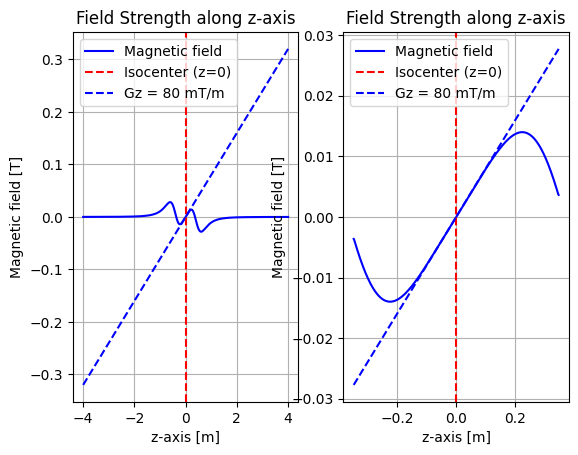

In [15]:
### Part C : constructing the Gz coil #######################################################################################################
def gradient_z(z, I, a, b):
    # Calculate the gradient
    #
    # INPUT:
    # z : values of space positions [m]
    # I : currents through the coils [A]
    # a : radius of the coils [m]
    # b : position of the coils [m]
    #
    # RETURN:
    # point_gradient : value of gradient of B at isocenter [T/m]
   
    B = ((mu0 * I * a**2) / (2 * ((np.sqrt(a**2 + (z - b)**2))**3))) + ((mu0 * -I * a**2) / (2 * ((np.sqrt(a**2 + (z + b)**2))**3)))
    gradient_z = np.gradient(B, z)
   
    return gradient_z




def point_gradient_z(z, I, a, b):
    # Calculate the gradient at the isocenter
    #
    # INPUT:
    # z : values of space positions [m]
    # I : currents through the coils [A]
    # a : radius of the coils [m]
    # b : position of the coils [m]
    #
    # RETURN:
    # point_gradient : value of gradient of B at isocenter [T/m]
   
    B = ((mu0 * I * a**2) / (2 * ((np.sqrt(a**2 + (z - b)**2))**3))) + ((mu0 * -I * a**2) / (2 * ((np.sqrt(a**2 + (z + b)**2))**3)))
    gradient = np.gradient(B, z)
    index_z_point = np.argmin(np.abs(z))
    point_gradient_z = gradient[index_z_point]
   
    return point_gradient_z




def optimize_currents4(I, z, a, b):
    # Create a system of equations to optimize currents for Maxwell pair
    #
    # INPUT:
    # I : currents through the coils [A]
    # z : values of space positions [m]
    # a : radius of the coils [m]
    # b : position of the coils [m]
    #
    # RETURN:
    # optimize_currents : equation system to find optimal currents for Maxwell pair
   
    optimize_currents4 = [point_gradient_z(z, I[0], a, b) - Gz]
   
    return optimize_currents4




# Optimal currents for Maxwell pair
I_g_opt = fsolve(optimize_currents4, [1e4], args=(z_values_b, a_g, sqrt(3)*a_g/2))
print(f'Optimal current for gradient coil: {I_g_opt[0]:.2f} A')



# Plot gradient field
G_z_b = gradient_z(z_values_b, I_g_opt, a_g, sqrt(3)*a_g/2)
BG_z_b = G_z_b * z_values_b
B_grad_z_b = Gz * z_values_b
zlimit = np.max([a/2, a_s/2, sqrt(3)*a_g/2])
print(f'Maximum coordinate between outermost coils: {np.real(zlimit):.2f} m')
z_values = np.linspace(-zlimit, zlimit, 500)
G_z = gradient_z(z_values, I_g_opt, a_g, sqrt(3)*a_g/2)
BG_z = G_z * z_values
B_grad_z = Gz * z_values
plt.figure(6)
plt.subplot(1,2,1)
plt.plot(z_values_b, BG_z_b , color='b', label='Magnetic field')
plt.axvline(0, color='r', linestyle='--', label='Isocenter (z=0)')
plt.plot(z_values_b, B_grad_z_b , color='b', linestyle='--', label='Gz = 80 mT/m')
plt.xlabel('z-axis [m]'); plt.ylabel('Magnetic field [T]'); plt.title('Field Strength along z-axis')
plt.legend(); plt.grid()
plt.subplot(1,2,2)
plt.plot(z_values, BG_z , color='b', label='Magnetic field')
plt.axvline(0, color='r', linestyle='--', label='Isocenter (z=0)')
plt.plot(z_values, B_grad_z , color='b', linestyle='--', label='Gz = 80 mT/m')
plt.xlabel('z-axis [m]'); plt.ylabel('Magnetic field [T]'); plt.title('Field Strength along z-axis')
plt.legend(); plt.grid()
plt.show()

## Part D
The minimum stimulation duration was evaluated as $τ_{min}=\frac{2\cdot G_{max}}{S}$ where $G_{max}$ is the maximum gradient magnetic field along the z-axis within the magnet bore, that was obtained in C2, and $S$ is the slew rate. 
Then, this minimum stimulation duration $τ_{min}=0.0008s$ was used to derive the time variation of the magnetic field within the scanner bore $\frac{dB}{dt}$, which was found to be above the threshold for PNS between $-0.28m$ and $-0.15m$ .

In the normal gradient operating mode, to ensure $\frac{dB}{dt}<\frac{dB}{dt}_{normalmode}$, the maximum gradient strength can be derived through optimization for fixed slew rate and PNS threshold. 
The maximum gradient strength was found to be $G_{normalmode}=0.10 T/m$.

Similarly, in the normal gradient operating mode, to ensure $\frac{dB}{dt}<\frac{dB}{dt}_{normalmode}$, the maximum slew rate can be derived through optimization for fixed gradient strength and PNS threshold. 
The slew rate was found to be $S_{max}=155.64 T/ms$.


D1: Minimum stimulation duration for gradient change: 0.0008 s
D2: Does dB/dt for two-coil configuration exceed PNS threshold? True
dB/dt exceeds PNS threshold between: -0.28 m and -0.15 m


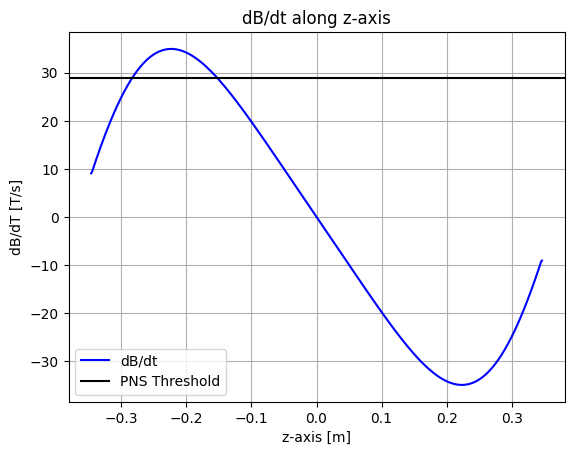

D3: Maximum gradient strength for normal mode: 0.10 T/m
D4: Slew rate to use Gmax under normal mode conditions: 155.64 T/ms


In [ ]:
### Part D : safety aspects Gz field ########################################################################################################
# Minimum stimulation duration for going from a negative trapezoidal to a positive trapezoidal gradient
max_G_z = G_z[np.argmax(np.abs(G_z))]
tau_min = (2 * max_G_z) / S
print(f"D1: Minimum stimulation duration for gradient change: {np.real(tau_min):.4f} s")


# dB/dt within the scanner bore
tau = tau_min
BG_z = G_z * z_values
dBGdt = - 2 * BG_z / tau
dBdtPNS_threshold = 20 * (1 + (0.00036 / tau))
dBdt_exceeds = np.any(dBGdt > dBdtPNS_threshold)
i_exceeds = np.where(dBGdt > dBdtPNS_threshold)
z_min = np.real(np.min(z_values[i_exceeds]))
z_max = np.real(np.max(z_values[i_exceeds]))
print(f"D2: Does dB/dt for two-coil configuration exceed PNS threshold? {dBdt_exceeds}")
print(f"dB/dt exceeds PNS threshold between: {z_min:.2f} m and {z_max:.2f} m")
plt.figure(7)
plt.plot(z_values, dBGdt, color='b', label='dB/dt')
plt.axhline(y=dBdtPNS_threshold, color='k', label='PNS Threshold')
plt.xlabel('z-axis [m]'); plt.ylabel('dB/dT [T/s]'); plt.title('dB/dt along z-axis')
plt.legend(); plt.grid()
plt.show()


# Maximum gradient strength for a fixed slew rate and PNS threshold
def optimize_G_normalmode(G_normalmode):
   
    tau = G_normalmode[0] / S  
    dBdt_normalmode = BG_z / tau  
    dBdtPNS_threshold = 20 * (1 + (0.00036 / tau))
    optimize_G_normalmode = [np.max(dBdt_normalmode) - (0.8 *dBdtPNS_threshold)]
   
    return optimize_G_normalmode


G_normalmode = fsolve(optimize_G_normalmode, [np.real(max_G_z)])

print(f"D3: Maximum gradient strength for normal mode: {G_normalmode[0]:.2f} T/m")


# Slew rate to use Gmax under normal mode conditions
def optimize_S_normalmode(S_normalmode):
   
    tau = max_G_z / S_normalmode[0]
    dB_dt_normalmode = BG_z / tau
    dBdtPNS_threshold = 20 * (1 + (0.00036 / tau))
    optimize_S_normalmode = [np.max(dB_dt_normalmode) - (0.8 * dBdtPNS_threshold)]


    return optimize_S_normalmode


S_normalmode = fsolve(optimize_S_normalmode, [S])
S_normalmode = np.real(S_normalmode[0])
print(f"D4: Slew rate to use Gmax under normal mode conditions: {S_normalmode:.2f} T/ms")